In [1]:
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
#all necessary packages for visualization

In [2]:
#first I need to import the raman spectra, by first converting the excel file into a csv file
#now I will import it
df = pd.read_csv('Raman_spectra.csv')#reading the file that I downloaded from canvas page (Raman_spectra.csv)
df# this will print out the data, so I can see it clearly 



,Wavenumber (cm-1),Raman intensity of isomer 1,Raman intensity of isomer 2
0,1003.15921,15.589396,15.762844
1,1007.36974,17.805745,19.172401
2,1011.58027,21.483374,24.541119
3,1015.79080,26.906392,34.374638
4,1020.00133,38.386091,52.375713
...,...,...,...
233,1984.21270,1.179667,0.816601
234,1988.42323,1.112883,0.770507
235,1992.63376,1.051612,0.728207
236,1996.84429,0.973362,0.686246


In [3]:
#need information on the dataset, so I will be checking if there is any null data or gaps:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wavenumber (cm-1)            238 non-null    float64
 1   Raman intensity of isomer 1  238 non-null    float64
 2   Raman intensity of isomer 2  238 non-null    float64
dtypes: float64(3)
memory usage: 5.7 KB


In [4]:
#3a) ) Visualize the distribution of isomer 1 (trans) and isomer 2 (cis) if the polymer chain contains:
#(i) 50 repeat units.

isomer_one, isomer_two, isomer_picked_for_repeated_unit = 0, 0, 0

isomer_picked_for_repeated_unit = 0 #this is the number of repeated units from the bbl isomer
while isomer_picked_for_repeated_unit < 50:#for 50 repeated units which will in a while loop to go on for 50 repetetions 
    isomer_randomly_picked = random.randrange( 2 )#there are only 2 isomers (isomer_one and isomer_two)
    if isomer_randomly_picked == 0:
        isomer_one += 1
    else:#else statement to pick the other isomer, 2:
        isomer_two += 1
    isomer_picked_for_repeated_unit += 1



    
print("Number of isomer 1 in repeated unit:",isomer_one)#this is how many isomer one are in the repeated unit (polymer)
print("Number of isomer 2 in repeated unit:",isomer_two)#this is how many isomer two are in the repeated unit(polymer)

Number of isomer 1 in repeated unit: 30
Number of isomer 2 in repeated unit: 20


In [5]:
#now for (ii) 200 repeat units. 
isomer_one_, isomer_two_, isomer_picked_for_repeated_unit_ = 0, 0, 0

isomer_picked_for_repeated_unit_ = 0 #this is the number of repeated units from the bbl isomer
while isomer_picked_for_repeated_unit_ < 200:#for 200 repeated units which will in a while loop to go on for 200 repetetions 
    isomer_randomly_picked_ = random.randrange( 2 )#there are only 2 isomers (isomer_one and isomer_two)
    if isomer_randomly_picked_ == 0:
        isomer_one_ += 1
    else:#else statement to pick the other isomer, 2:
        isomer_two_ += 1
    isomer_picked_for_repeated_unit_ += 1



    
print("Number of isomer 1 in repeated unit:",isomer_one_)#this is how many isomer one are in the repeated unit (polymer)
print("Number of isomer 2 in repeated unit:",isomer_two_)#this is how many isomer two are in the repeated unit(polymer)




Number of isomer 1 in repeated unit: 102
Number of isomer 2 in repeated unit: 98


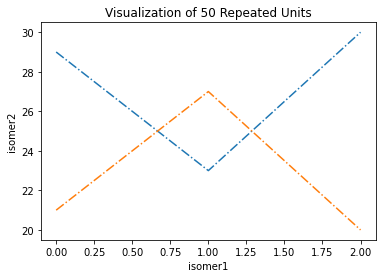

In [6]:
#i) 50 repeated units visualization
x = np.array([29,23,30]) #a few outputs that I ran on the code to get some random values
y = np.array([21, 27,20])# a few outputs that I ran on the code to get some random values
plt.title('Visualization of 50 Repeated Units')
plt.xlabel('isomer1')
plt.ylabel('isomer2')
plt.plot(x,'-.', y, '-.')
plt.show()


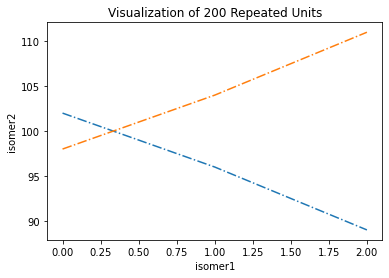

In [7]:
#ii) visualization of 200 repeated units
x_ = np.array([102,96,89]) #a few outputs that I ran on the code to get some random values
y_ = np.array([98, 104,111])# a few outputs that I ran on the code to get some random values
plt.title('Visualization of 200 Repeated Units')
plt.xlabel('isomer1')
plt.ylabel('isomer2')
plt.plot(x_,'-.', y_, '-.')
plt.show()


In [8]:
#3b)
# I have already downloaded the data, now I need to take the average of the 200 repeated units Raman spectra
# to do this I need to implement an equation

df1=df.mean()
df1
#this function is calling the mean of the repeated units, which is this 


Wavenumber (cm-1)              1502.107015
Raman intensity of isomer 1     938.912763
Raman intensity of isomer 2    1135.011057
dtype: float64